In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

## Notebook Setting

In order to display the interactive elements of PyCaret in the Google Colab environment, you need to run the following code.

In [2]:
from pycaret.utils import enable_colab

enable_colab()

Colab mode enabled.


## Datasets Loading

Data used here came from the Darden Case Study: "Sarah Gets a Diamond" (UVA-QA-0702).

Diamonds are primarily based on four criteria known as the “four Cs”: cut, color, clarity, and carat weight. In addition to these factors, other less-known qualifiers (e.g., fluorescence, polish, and symmetry) marginally influence the value of the stone.

- **ID** - a unique id given to each diamond
- **Carat Weight** - size of the diamond
- **Cut** - diamond cut ratings, in ascending order, are: poor, fair, good, very good, ideal, and signature ideal
- **Color** - diamonds are graded on a letter scale from Z (noticeable color) to D (absolutely colorless)
- **Clarity** - Gems free of blemishes are known to be FL (flawless), followed by IF (internally flawless), VVS1 and VVS2 (very, very slight inclusions), VS1 and VS2 (very slight inclusions), SI1 and SI2 (slight inclusions), and I1, I2, and I3
- **Polish** - graded using G (good), VG (very good), and EX (excellent) categories
- **Symmetry** - graded using G (good), VG (very good), and EX (excellent) categories
- **Report** - graded using G (good), VG (very good), EX (excellent) and ID (ideal) categories
- **Price** - the price of the diamonds in USD

https://www.kaggle.com/c/abafall2020/data

In [3]:
from pycaret.datasets import get_data

dataset = get_data("diamond")
print(f"Datasets Shape : {dataset.shape}")

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


Datasets Shape : (6000, 8)


**Extract "unseen data" from the training data to be used for validation of the trained model**

In [4]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print(f"Training Data Shape: {data.shape}")
print(f"Test Data Shape: {data_unseen.shape}")

Training Data Shape: (5400, 8)
Test Data Shape: (600, 8)


## Environment Configuration

Sets up the **PyCaret** environment.  
The setup function initializes the **PyCaret** environment, but must be called before any other **PyCaret** function is executed.  

When you run the following code, the setup function will be executed and the data types of all features will be automatically inferred.  
Note that this does not necessarily mean that the inference will be correct.     
If there is no problem with the data type, you can complete the setup by entering a blank. 

In [5]:
from pycaret.regression import setup

clf = setup(data=data, target="Price", fold_shuffle=True, session_id=123)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"


## Model Comparison

Evaluates the performance of various models by comparing them.  
The `compare_models` function trains with all the models in the library and evaluates the scores. 

In [6]:
from pycaret.regression import compare_models

best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,740.4296,2342506.0020,1485.1782,0.9776,0.0820,0.0608,0.2160
rf,Random Forest Regressor,759.4491,2711273.2333,1592.2343,0.9742,0.0828,0.0603,0.1960
lightgbm,Light Gradient Boosting Machine,769.7291,3307562.1553,1740.6027,0.9689,0.0790,0.0572,0.0200
gbr,Gradient Boosting Regressor,909.6734,3272438.1542,1774.7185,0.9685,0.1020,0.0771,0.0630
dt,Decision Tree Regressor,983.5003,4214259.6604,2025.7598,0.9588,0.1078,0.0780,0.0080
ridge,Ridge Regression,2413.0245,14101654.3063,3723.2135,0.8623,0.6580,0.2875,0.0040
lr,Linear Regression,2416.0541,14231723.0671,3730.0059,0.8617,0.6691,0.2874,0.2580
lasso,Lasso Regression,2411.8782,14238733.6591,3732.7037,0.8616,0.6715,0.2866,0.0090
llar,Lasso Least Angle Regression,2354.9196,14257015.1956,3733.0163,0.8616,0.6448,0.2728,0.0050
br,Bayesian Ridge,2415.6279,14271327.1132,3737.8770,0.8612,0.6608,0.2873,0.0070


**With just one line of code, we were able to train and evaluate over 15 machine learning models.**
  
**An overview of the best scoring models is shown below.**

In [7]:
print(best_model)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)


## Model Building

The `models` function allows you to see all available machine learning models.

In [8]:
from pycaret.regression import models

models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


> The `create_model` function uses **cross-validation** to train and evaluate individual models.
> By default, it divides the data into 10 parts and tries 10 different combinations of test data/training data.

In this case, we will create a model for **Random Forest Regressor**.  

In [9]:
from pycaret.regression import create_model

rf = create_model("rf")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,781.0035,2091000.7627,1446.0293,0.9768,0.0838,0.0638
1,662.2603,1425447.8048,1193.9212,0.9841,0.0756,0.0570
2,633.0400,1320524.8326,1149.1409,0.9862,0.0712,0.0545
3,655.8642,1677228.7383,1295.0787,0.9809,0.0789,0.0582
4,804.4047,2304090.7999,1517.9232,0.9780,0.0861,0.0638
5,729.6119,3907503.2894,1976.7406,0.9637,0.0836,0.0547
6,756.6185,1882670.6635,1372.1045,0.9808,0.0823,0.0632
7,757.5270,1821804.9192,1349.7425,0.9792,0.0777,0.0605
8,899.5135,5175292.3264,2274.9269,0.9625,0.0925,0.0628
9,914.6471,5507168.1964,2346.7356,0.9499,0.0965,0.0645


**Displays an overview of the trained model.**

In [10]:
print(rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


> The meaning of each hyperparameter is explained in the official **scikit-learn** documentation.  
> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

## Adjusting Hyperparameters

The `create_model` function trains the model using the default hyperparameters.  
To tune the hyperparameters, use the `tune_model` function.   

In [11]:
from pycaret.regression import tune_model

tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1064.6901,4554931.5079,2134.2286,0.9495,0.1132,0.0839
1,800.2614,1904472.4849,1380.0263,0.9788,0.0948,0.0735
2,845.4475,2582220.9597,1606.9290,0.9731,0.0932,0.0726
3,798.0894,2300225.2535,1516.6494,0.9738,0.1001,0.0759
4,985.9667,3870403.8917,1967.3342,0.9631,0.1057,0.0790
5,947.6937,5655076.9262,2378.0406,0.9474,0.1048,0.0741
6,971.7502,3246648.0755,1801.8457,0.9668,0.1040,0.0789
7,912.5439,2709672.1520,1646.1082,0.9691,0.0953,0.0736
8,1123.4766,7779679.2565,2789.2076,0.9436,0.1114,0.0812
9,1081.1846,7348299.2213,2710.7747,0.9332,0.1104,0.0751


**Displays an overview of the trained model, with hyperparameters adjusted.**  

In [12]:
print(tuned_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.1,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


## Model Evaluations

The `plot_model` function allows you to analyze the model from various angles.  

- See : https://pycaret.org/plot-model/

If no plot is specified in the `plot_model` function, a Residual Plot will be displayed.  
The residual plot is a plot of the predicted values on the horizontal axis and the regression residuals on the vertical axis.  
This allows you to determine if there is any regularity or bias in the variance. 

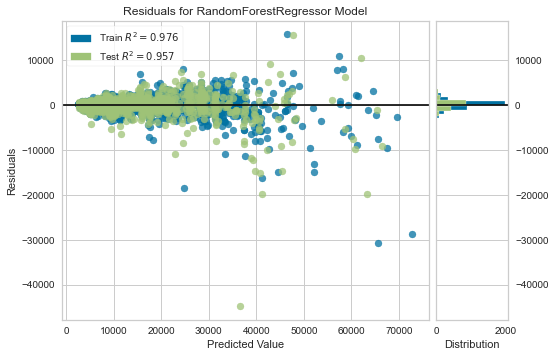

In [13]:
from pycaret.regression import plot_model

plot_model(tuned_rf)

**The following code plots the importance of each feature.**

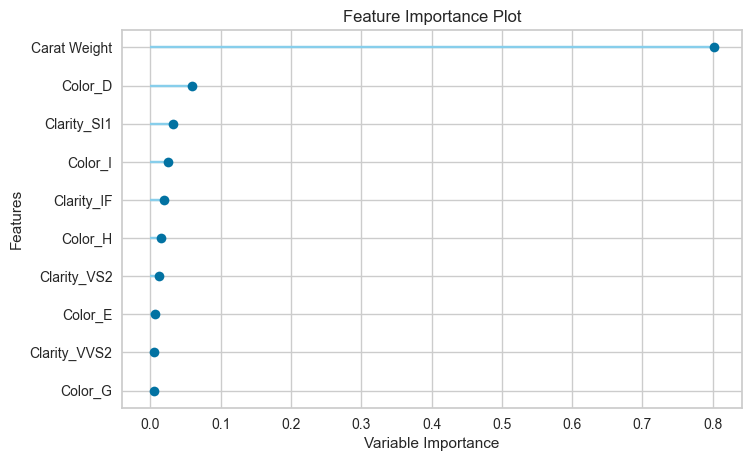

In [14]:
plot_model(tuned_rf, plot="feature")

The model can also be evaluated with the `evaluate_model` function.  

In [15]:
from pycaret.regression import evaluate_model

evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Model Deployment

The `finalize_model` function trains the model with all the datasets and creates the model for deployment.   

In [16]:
from pycaret.regression import finalize_model

final_rf = finalize_model(tuned_rf)
print(final_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.1,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


The `predict_model` function evaluates the model for deployment.

In [17]:
from pycaret.regression import predict_model

predict_model(final_rf);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,779.9612,2424848.4114,1557.1925,0.9779,0.0856,0.0645


The `save_model` function allows you to save the model.  

In [18]:
from pycaret.regression import save_model

save_model(final_rf, "rf_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                        criterion='mse', max_depth=9,
                                        max_features=1.0, max_leaf_nodes=None,
                                        max_samples=None,
                                   

The `load_model` function allows you to load a saved model.

In [19]:
from pycaret.regression import load_model

loaded_rf = load_model("rf_model")

Transformation Pipeline and Model Successfully Loaded


## Predicting with unseen data

Use the model for deployment to forecast prices with **unseen data**. 

In [21]:
unseen_pred = predict_model(loaded_rf, data=data_unseen)
unseen_pred.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,11817.827177
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10822.844106
2,1.01,Good,E,SI1,G,G,GIA,5161,5186.892762
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,37373.822167
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4170.544017
